In [165]:
conda env list


# conda environments:
#
                         C:\Users\seun\AppData\Local\R-MINI~1
                         C:\Users\seun\AppData\Local\R-MINI~1\envs\r-reticulate
base                  *  C:\Users\seun\anaconda3
Note: you may need to restart the kernel to use updated packages.




In [104]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [105]:
# Load the Model back from folder

#import pickle 

#Pkl_Filename = "Pickle_test_Model.pkl"  
#with open(Pkl_Filename, 'rb') as file:  
   # Pickle_test_Model = pickle.load(file)

#Pickle_test_Model

In [106]:
def image_resizing(image_path):
    """
    This function resizes an input image to 224 X 224
    """
    img = image.load_img(image_path, target_size=(224,224))
    return img

In [107]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
 
def image_preprocessing(resized_image):
    """
    This function preprocesses the input image for MobileNetV2
    """
    pic_array = image.img_to_array(resized_image)
    image_batch = np.expand_dims(pic_array, axis=0)
    processed_image = preprocess_input(image_batch)
    return processed_image

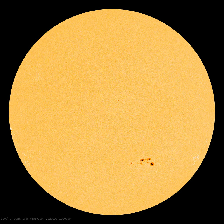

In [166]:
# resize and show image
from tensorflow.keras.preprocessing import image
resized_image = image_resizing('cb.jpg')
resized_image

In [167]:
# preprocess an image
preprocessed_img = image_preprocessing(resized_image)

In [169]:
# this are the folder names
classes=['B_class', 'C_class']

In [170]:
def image_classification(preprocessed_image, model):
    probs = model.predict(preprocessed_image)[0].tolist()
    zipped = sorted(list(zip(classes, probs)), key=lambda x: x[1], reverse=True)
    image_class = [zipped[i][0] for i in range(len(zipped))]
    probability  = [zipped[i][1]*100 for i in range(len(zipped))]
    df = pd.DataFrame(data={'image_class':image_class, 'probability(%)': probability})
    return df

In [181]:
from keras.models import load_model
modelw = load_model("my_model6.h5")
modelw

In [182]:
tf.autograph.experimental.do_not_convert
df=image_classification(preprocessed_img, modelw)


1/1 [==============================] - 4s 4s/step


In [183]:
df

,image_class,probability(%)
0,C_class,97.893858
1,B_class,2.106136


In [184]:
df=df.sort_values(by= "image_class").reset_index(drop=True)
df

,image_class,probability(%)
0,B_class,2.106136
1,C_class,97.893858


In [102]:
a=df.iloc[0,1]
a

99.78127479553223

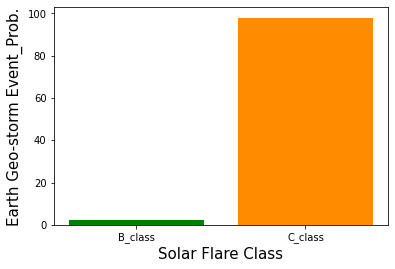

In [190]:
x = df['image_class']
y = df ["probability(%)"]

#plt.figure(figsize=(14, 4))

fig, ax = plt.subplots()

ax.bar(x, y, color=['green', 'darkorange', 'yellowgreen'])

# Setting the x-acis label and its size
plt.xlabel("Solar Flare Class", size=15)

# Setting the y-axis label and its size
plt.ylabel("Earth Geo-storm Event_Prob.", size=15)

#ax.set_title('XY Stock')

plt.show()